In [1]:
# Importing Required Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random


In [7]:
# loading and splitting dataset
mnist=tf.keras.datasets.mnist


In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

In [9]:
# Normalising data
x_train= x_train/255.0
x_test= x_test/255.0



In [11]:
# Defining Network with Keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Training Neural Network With sgd
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])


In [25]:
h=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6561 - accuracy: 0.8347 - val_loss: 0.3631 - val_accuracy: 0.8997
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3394 - accuracy: 0.9059 - val_loss: 0.2959 - val_accuracy: 0.9186
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2889 - accuracy: 0.9184 - val_loss: 0.2619 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9273 - val_loss: 0.2374 - val_accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2345 - accuracy: 0.9341 - val_loss: 0.2209 - val_accuracy: 0.9362
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9399 - val_loss: 0.2037 - val_accuracy: 0.9415
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1991 - accuracy: 0.9445 - val_loss: 0.1901 - val_accuracy:

In [26]:
# evaluating the model
test_loss,test_accu=model.evaluate(x_test,y_test)
print("Loss=%.2f" %test_loss)
print("Accuracy=%.2f" %test_accu)

313/313 [==============================] - 1s 2ms/step - loss: 0.1593 - accuracy: 0.9536
Loss=0.16
Accuracy=0.95


Text(0, 0.5, 'accuracy\\loss')

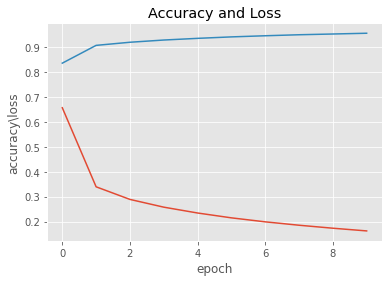

In [41]:
# ploatting graph of accuracy and loss
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,10),h.history["loss"])
plt.plot(np.arange(0,10),h.history["accuracy"])
plt.title("Accuracy and Loss")
plt.xlabel("epoch")
plt.ylabel("accuracy\loss")